## Leer los datos

In [1]:
import pandas as pd

data = pd.read_csv('simulacion_oxxo.csv')

data.head()

,Elapsed time,Lap
0,02:07:56,00:01:25
1,02:06:30,00:01:23
2,02:05:06,00:00:18
3,02:04:48,00:01:06
4,02:03:42,00:00:32


## Dar formato a los minutos (e.g. 00:00:30 -> 0.5 minutos)

In [2]:
ftr = [3600,60,1]

llegadas = []
for entrada in data['Lap']:
    llegadas.append(sum([a*b for a,b in zip(ftr, map(int,entrada.strip().split(':')))])/60)

data['Minutes'] = llegadas
data.head()

,Elapsed time,Lap,Minutes
0,02:07:56,00:01:25,1.416667
1,02:06:30,00:01:23,1.383333
2,02:05:06,00:00:18,0.300000
3,02:04:48,00:01:06,1.100000
4,02:03:42,00:00:32,0.533333


## Histograma

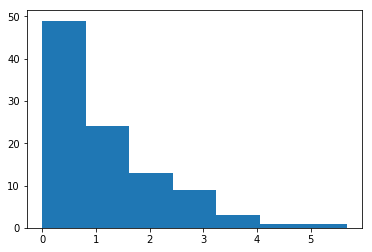

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

freq, bins, _ = plt.hist(data['Minutes'], bins=7)

## Media muestral

In [14]:
data['Minutes'].mean()

1.204833333333333

## Intervalos

In [5]:
tabla = pd.DataFrame()

intervalos = []

for i in range(1, 8):
    int = '{0: > .3f} - {1: > .3f}'.format(bins[i-1], bins[i])
    intervalos.append(int)
    
tabla['Intervalos de llegada'] = intervalos
tabla

,Intervalos de llegada
0,0.000 - 0.810
1,0.810 - 1.619
2,1.619 - 2.429
3,2.429 - 3.238
4,3.238 - 4.048
5,4.048 - 4.857
6,4.857 - 5.667


## Frecuencia observada

In [6]:
tabla['Frecuencia observada'] = freq
tabla

,Intervalos de llegada,Frecuencia observada
0,0.000 - 0.810,49.0
1,0.810 - 1.619,24.0
2,1.619 - 2.429,13.0
3,2.429 - 3.238,9.0
4,3.238 - 4.048,3.0
5,4.048 - 4.857,1.0
6,4.857 - 5.667,1.0


## Probabilidad de ocurrencia

In [7]:
from scipy.stats import expon

probs = []
for i in range(1,7):
    cdf = round(expon.cdf(bins[i]) - expon.cdf(bins[i-1]), 4)
    probs.append(cdf)
    
probs.append(1-sum(probs))

tabla['Probabilidad de ocurrencia'] = probs
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia
0,0.000 - 0.810,49.0,0.5549
1,0.810 - 1.619,24.0,0.2470
2,1.619 - 2.429,13.0,0.1099
3,2.429 - 3.238,9.0,0.0489
4,3.238 - 4.048,3.0,0.0218
5,4.048 - 4.857,1.0,0.0097
6,4.857 - 5.667,1.0,0.0078


## Frecuencia esperada

In [8]:
tabla['Frecuencia esperada'] = [round(100*p, 4) for p in probs]
tabla 

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada
0,0.000 - 0.810,49.0,0.5549,55.49
1,0.810 - 1.619,24.0,0.2470,24.70
2,1.619 - 2.429,13.0,0.1099,10.99
3,2.429 - 3.238,9.0,0.0489,4.89
4,3.238 - 4.048,3.0,0.0218,2.18
5,4.048 - 4.857,1.0,0.0097,0.97
6,4.857 - 5.667,1.0,0.0078,0.78


## Agrupación (>=5)

In [9]:
tabla['Agrupada (>=5)'] = ''
tabla.loc[6, 'Agrupada (>=5)'] = sum(tabla['Frecuencia esperada'][[3, 4, 5, 6]])
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5)
0,0.000 - 0.810,49.0,0.5549,55.49,
1,0.810 - 1.619,24.0,0.2470,24.70,
2,1.619 - 2.429,13.0,0.1099,10.99,
3,2.429 - 3.238,9.0,0.0489,4.89,
4,3.238 - 4.048,3.0,0.0218,2.18,
5,4.048 - 4.857,1.0,0.0097,0.97,
6,4.857 - 5.667,1.0,0.0078,0.78,8.82


## Chi cuadrada calculada

In [16]:
o = list(tabla['Frecuencia observada'][[0,1,2]])
o.append(sum(tabla['Frecuencia observada'][[3,4,5,6]]))

e = list(tabla['Frecuencia esperada'][[0,1,2]])
e.append(tabla['Agrupada (>=5)'][6])

chi = []
for i in range(0,4):
    chi.append(((o[i] - e[i])**2)/e[i])

chi_calculada = sum(chi)
chi.insert(3, '')
chi.insert(4, '')
chi.insert(5, '')
tabla['Chi cuadrada'] = chi

tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5),Chi cuadrada
0,0.000 - 0.810,49.0,0.5549,55.49,,0.759057
1,0.810 - 1.619,24.0,0.2470,24.70,,0.0198381
2,1.619 - 2.429,13.0,0.1099,10.99,,0.367616
3,2.429 - 3.238,9.0,0.0489,4.89,,
4,3.238 - 4.048,3.0,0.0218,2.18,,
5,4.048 - 4.857,1.0,0.0097,0.97,,
6,4.857 - 5.667,1.0,0.0078,0.78,8.82,3.04222


In [11]:
chi_calculada

4.1887337812967198

## Chi cuadrada inversa

In [12]:
from scipy.stats import chi2

chi2.isf(.05, 2)

5.9914645471079817